In [1]:
%pylab inline

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Easy to load

Note: If you haven't done so yet, generate a "result.csv" file by runnning ```make result``` from the command line in the parent directory of this git repository

In [2]:
df = pd.read_csv('../data_generator/results/result.csv')

In [3]:
df.head()

,here,is,a,sample,header,to,try
0,2322,6467,2742,1252,1357,1244,3412
1,3367,62,7301,3711,2202,2306,6213
2,6141,3204,3360,7726,1301,2547,4271
3,17,4030,1736,1637,7725,3236,6030
4,2565,2343,4062,3157,1643,532,4752


## Quick to analyze

In [4]:
df.describe()

,here,is,a,sample,header,to,try
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,3890.736000,3852.694400,3869.284000,3816.940000,3873.069600,3925.309200,3950.454800
std,2310.652104,2290.774171,2283.270721,2306.059916,2299.080693,2292.342965,2295.604315
min,2.000000,4.000000,4.000000,0.000000,0.000000,1.000000,1.000000
25%,1775.000000,1759.000000,2036.500000,1730.750000,1751.000000,2024.000000,2048.750000
50%,3755.000000,3711.000000,3773.000000,3731.000000,3775.500000,4030.500000,4045.500000
75%,6006.250000,5715.250000,5753.750000,5757.000000,5741.000000,6033.250000,6053.500000
max,7772.000000,7776.000000,7773.000000,7777.000000,7777.000000,7776.000000,7777.000000


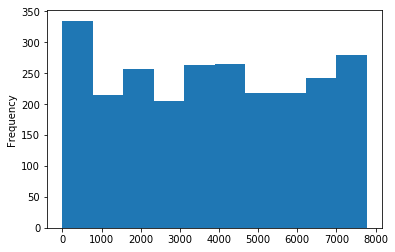

In [5]:
_=df['sample'].plot(kind='hist',bins=10)

## Easy filtering

In [6]:
mask = range(2000,2500)

In [7]:
df_filt = df[df['sample'].isin(mask)]
df_filt.head()

,here,is,a,sample,header,to,try
27,4130,1505,1070,2031,1435,5741,4200
30,4012,1450,7442,2326,6045,5024,2613
41,3127,5421,5417,2137,6377,1700,4326
57,3505,107,6445,2236,1744,4357,6231
58,6142,3351,7701,2056,6755,5663,6224


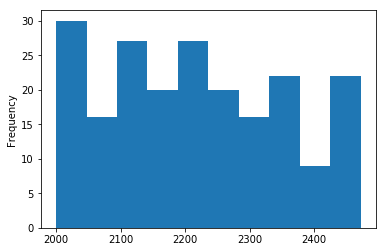

In [8]:
_=df_filt['sample'].plot(kind='hist',bins=10)

# Distribution fitting

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [10]:
# Distribution-fitting method outline from http://www.insightsbot.com/blog/WEjdW/fitting-probability-distributions-with-python-part-1

def fit_dist(samples):
    dist_tests = ['norm', 'expon', 'uniform', 'rayleigh']
    dist_results = []
    params = {}
    for dist_name in dist_tests:

        # Fit sample data to distribution
        dist = getattr(stats, dist_name)
        param = dist.fit(samples)
        params[dist_name] = param

        # Run the Kolmogorov-Smirnov test on the distribution
        D, p = stats.kstest(samples, dist_name, args = param)

        dist_results.append((dist_name, p))

    print("Kolmogorov-Smirnov test results")
    for result in dist_results:
        print("%15s\t: %f"%(result[0], result[1]))
    dist_guess, p = (max(dist_results, key=lambda item:item[1]))
    print()
    print("Distribution guess is %s with a p value of %f"%(dist_guess, p))
    print()

In [51]:
# Test each of our columns for 
for col in df.columns:
    print("Testing distrubutions on '%s' column\n"%col)
    fit_dist(df.get(col))
    print("=============================================================")
    


Testing distrubutions on 'here' column

Kolmogorov-Smirnov test results
           norm	: 0.000000
          expon	: 0.000000
        uniform	: 0.036352
       rayleigh	: 0.000000

Distribution guess is uniform with a p value of 0.036352

Testing distrubutions on 'is' column

Kolmogorov-Smirnov test results
           norm	: 0.000000
          expon	: 0.000000
        uniform	: 0.061328
       rayleigh	: 0.000000

Distribution guess is uniform with a p value of 0.061328

Testing distrubutions on 'a' column

Kolmogorov-Smirnov test results
           norm	: 0.000000
          expon	: 0.000000
        uniform	: 0.080947
       rayleigh	: 0.000000

Distribution guess is uniform with a p value of 0.080947

Testing distrubutions on 'sample' column

Kolmogorov-Smirnov test results
           norm	: 0.000000
          expon	: 0.000000
        uniform	: 0.002940
       rayleigh	: 0.000000

Distribution guess is uniform with a p value of 0.002940

Testing distrubutions on 'header' column

Kolmo

## Easy to export to RLDB (from Python or from BASH)

In [13]:
import psycopg2 as sql

/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [14]:
SQL_STATEMENT = """
    COPY %s FROM STDIN WITH
        CSV
        HEADER
        DELIMITER AS ','
"""

In [15]:
def csv2db(conn, table_name, fh):
    cursor = conn.cursor()
    cursor.copy_expert(sql=SQL_STATEMENT % table_name, file=fh)
    conn.commit()
    cursor.close()

In [16]:
connection = sql.connect("dbname=cdse user=qwofford password=NOTMYPASSWORD")
try:
    csv2db(connection,'master',fh)
finally:
    connection.close()

OperationalError: could not connect to server: No such file or directory
	Is the server running locally and accepting
	connections on Unix domain socket "/var/run/postgresql/.s.PGSQL.5432"?
